### Library

In [1]:
import pandas as pd
import numpy as np
import string
import xml.etree.ElementTree as ET
import nltk
import re

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report

In [2]:
# Import Data
data_manual = r'D:\Andriko Fajar\Universitas Brawijaya\Semester 8\Skripsi\Data Manual.csv'

In [3]:
datamanual = pd.read_csv(data_manual)
datamanual

,Review,Aspek
0,Judging from previous posts this used to be a ...,RESTAURANT#GENERAL
1,"We, there were four of us, arrived at noon - t...",SERVICE#GENERAL
2,"They never brought us complimentary noodles, i...",SERVICE#GENERAL
3,The food was lousy - too sweet or too salty an...,FOOD#QUALITY
4,"After all that, they complained to me about th...",SERVICE#GENERAL
5,Avoid this place!,RESTAURANT#GENERAL
6,"I have eaten at Saul, many times, the food is ...",FOOD#QUALITY
7,Ive asked a cart attendant for a lotus leaf wr...,SERVICE#GENERAL


In [4]:
datamanual['Aspek'].value_counts()

Aspek
SERVICE#GENERAL       4
RESTAURANT#GENERAL    2
FOOD#QUALITY          2
Name: count, dtype: int64

In [5]:
aspek = datamanual.loc[:,['Aspek']]
aspek

,Aspek
0,RESTAURANT#GENERAL
1,SERVICE#GENERAL
2,SERVICE#GENERAL
3,FOOD#QUALITY
4,SERVICE#GENERAL
5,RESTAURANT#GENERAL
6,FOOD#QUALITY
7,SERVICE#GENERAL


In [6]:
ulasan = datamanual.loc[:,['Review']]
ulasan

,Review
0,Judging from previous posts this used to be a ...
1,"We, there were four of us, arrived at noon - t..."
2,"They never brought us complimentary noodles, i..."
3,The food was lousy - too sweet or too salty an...
4,"After all that, they complained to me about th..."
5,Avoid this place!
6,"I have eaten at Saul, many times, the food is ..."
7,Ive asked a cart attendant for a lotus leaf wr...


## Text Preprocessing

### Case Folding

In [7]:
def casefolding(opinion):
    opinion = opinion.casefold()
    return opinion

### Remove Punctuation

In [8]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

### Stop Word Removal

In [9]:
def stop_words(opinion):
    filteredsentence=[]
    stop_words = set(stopwords.words('english'))
    wordtokenize = word_tokenize(opinion)
    for word in wordtokenize:
        if word not in stop_words:
            filteredsentence.append(word)
    final_list=' '.join(filteredsentence)
    return final_list

### Lemmatization

In [10]:
def lemmatize_text(text):
    wnl = WordNetLemmatizer()
    tokens = word_tokenize(text)  # Tokenisasi kata
    pos_tags = nltk.pos_tag(tokens)  # Menentukan pos tag untuk setiap kata

    # Menggunakan pos tag untuk memberikan informasi yang tepat kepada lemmatizer
    lemmatized_words = []
    for token, pos in pos_tags:
        pos_tag = get_wordnet_pos(pos)
        lemmatized_word = wnl.lemmatize(token, pos=pos_tag)
        lemmatized_words.append(lemmatized_word)

    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

### Tokenization

In [11]:
def tokenisasi(content):
    content = nltk.tokenize.word_tokenize(content)
    return content

In [12]:
datamanual['Review'] = datamanual['Review'].apply(casefolding)
datamanual

,Review,Aspek
0,judging from previous posts this used to be a ...,RESTAURANT#GENERAL
1,"we, there were four of us, arrived at noon - t...",SERVICE#GENERAL
2,"they never brought us complimentary noodles, i...",SERVICE#GENERAL
3,the food was lousy - too sweet or too salty an...,FOOD#QUALITY
4,"after all that, they complained to me about th...",SERVICE#GENERAL
5,avoid this place!,RESTAURANT#GENERAL
6,"i have eaten at saul, many times, the food is ...",FOOD#QUALITY
7,ive asked a cart attendant for a lotus leaf wr...,SERVICE#GENERAL


In [13]:
datamanual['Review'] = datamanual['Review'].apply(remove_punctuation)
datamanual

,Review,Aspek
0,judging from previous posts this used to be a ...,RESTAURANT#GENERAL
1,we there were four of us arrived at noon the ...,SERVICE#GENERAL
2,they never brought us complimentary noodles ig...,SERVICE#GENERAL
3,the food was lousy too sweet or too salty and...,FOOD#QUALITY
4,after all that they complained to me about the...,SERVICE#GENERAL
5,avoid this place,RESTAURANT#GENERAL
6,i have eaten at saul many times the food is al...,FOOD#QUALITY
7,ive asked a cart attendant for a lotus leaf wr...,SERVICE#GENERAL


In [14]:
datamanual['Review'] = datamanual['Review'].apply(lambda x: stop_words(x))
datamanual

,Review,Aspek
0,judging previous posts used good place longer,RESTAURANT#GENERAL
1,four us arrived noon place empty staff acted l...,SERVICE#GENERAL
2,never brought us complimentary noodles ignored...,SERVICE#GENERAL
3,food lousy sweet salty portions tiny,FOOD#QUALITY
4,complained small tip,SERVICE#GENERAL
5,avoid place,RESTAURANT#GENERAL
6,eaten saul many times food always consistently...,FOOD#QUALITY
7,ive asked cart attendant lotus leaf wrapped ri...,SERVICE#GENERAL


In [15]:
datamanual['Review'] = datamanual['Review'].apply(lemmatize_text)
datamanual

,Review,Aspek
0,judge previous post use good place longer,RESTAURANT#GENERAL
1,four u arrive noon place empty staff act like ...,SERVICE#GENERAL
2,never bring u complimentary noodle ignore repe...,SERVICE#GENERAL
3,food lousy sweet salty portion tiny,FOOD#QUALITY
4,complain small tip,SERVICE#GENERAL
5,avoid place,RESTAURANT#GENERAL
6,eaten saul many time food always consistently ...,FOOD#QUALITY
7,ive ask cart attendant lotus leaf wrap rice re...,SERVICE#GENERAL


In [16]:
df_tokenisasi = datamanual['Review'].apply(tokenisasi)
df_tokenisasi

0    [judge, previous, post, use, good, place, longer]
1    [four, u, arrive, noon, place, empty, staff, a...
2    [never, bring, u, complimentary, noodle, ignor...
3           [food, lousy, sweet, salty, portion, tiny]
4                               [complain, small, tip]
5                                       [avoid, place]
6    [eaten, saul, many, time, food, always, consis...
7    [ive, ask, cart, attendant, lotus, leaf, wrap,...
Name: Review, dtype: object

In [17]:
# def preprocessingdata(data):
#     hasil = casefolding(data)
#     hasil = remove_punctuation(hasil)
#     hasil = stop_words(hasil)
#     hasil = lemmatize_text(hasil)
#     return hasil

In [18]:
# datamanual['Preprocessing'] = datamanual['Review'].apply(preprocessingdata)
# datamanual

In [19]:
data = datamanual.loc[:,['Review']]
data

,Review
0,judge previous post use good place longer
1,four u arrive noon place empty staff act like ...
2,never bring u complimentary noodle ignore repe...
3,food lousy sweet salty portion tiny
4,complain small tip
5,avoid place
6,eaten saul many time food always consistently ...
7,ive ask cart attendant lotus leaf wrap rice re...


## Perhitungan TF IDF

In [20]:
def Tokenize(data):
    data['review_token'] = ""
    data['Review'] = data['Review'].astype('str')
    for i in range(len(data)):
        data['review_token'][i] = data['Review'][i].lower().split()
        all_tokenize = sorted(list(set([item for sublist in data['review_token'] for item in sublist])))
    return data, all_tokenize

### Perhitungan TF

In [21]:
from operator import truediv

def hitungTF(data, all_tokenize):
    token_cal = Tokenize(data)
    data_tokenize = token_cal[0]
    for item in all_tokenize:
      data_tokenize[item] = 0
    for item in all_tokenize:
        for i in range(len(data_tokenize)):
          if data_tokenize['review_token'][i].count(item) > 0:
            a = data_tokenize['review_token'][i].count(item)
            b = len(data_tokenize['review_token'][i])
            c = a / b
            data_tokenize[item] = data_tokenize[item].astype('float')
            data_tokenize[item][i] = c
    return data_tokenize

In [22]:
hitungTF(data, Tokenize(data)[1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2501605007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokenize[item][i] = c
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2501605007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokenize[item][i] = c
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2501605007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokenize[item][i] = c
C:\Users\ASUS\AppDa

,Review,review_token,act,always,arrive,ask,attendant,avoid,away,back,...,sweet,table,throw,time,tiny,tip,u,use,walk,wrap
0,judge previous post use good place longer,"[judge, previous, post, use, good, place, longer]",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
1,four u arrive noon place empty staff act like ...,"[four, u, arrive, noon, place, empty, staff, a...",0.090909,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000
2,never bring u complimentary noodle ignore repe...,"[never, bring, u, complimentary, noodle, ignor...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000
3,food lousy sweet salty portion tiny,"[food, lousy, sweet, salty, portion, tiny]",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
4,complain small tip,"[complain, small, tip]",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
5,avoid place,"[avoid, place]",0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,eaten saul many time food always consistently ...,"[eaten, saul, many, time, food, always, consis...",0.000000,0.111111,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,ive ask cart attendant lotus leaf wrap rice re...,"[ive, ask, cart, attendant, lotus, leaf, wrap,...",0.000000,0.000000,0.000000,0.076923,0.076923,0.0,0.076923,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923


### Perhitungan IDF

In [23]:
def hitungIDF(data):
    N = len(data)
    all_tokenize = Tokenize(data)[1]
    _idf = hitungTF(data, all_tokenize)
    for item in all_tokenize:
        df_ = (_idf[item] > 0).sum()
        idf = (np.log(N / df_))
        _idf[item] = idf
    return _idf

In [24]:
df_idf = hitungIDF(data)
df_idf

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2939030479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_token'][i] = data['Review'][i].lower().split()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2939030479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_token'][i] = data['Review'][i].lower().split()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2939030479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,Review,review_token,act,always,arrive,ask,attendant,avoid,away,back,...,sweet,table,throw,time,tiny,tip,u,use,walk,wrap
0,judge previous post use good place longer,"[judge, previous, post, use, good, place, longer]",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
1,four u arrive noon place empty staff act like ...,"[four, u, arrive, noon, place, empty, staff, a...",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
2,never bring u complimentary noodle ignore repe...,"[never, bring, u, complimentary, noodle, ignor...",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
3,food lousy sweet salty portion tiny,"[food, lousy, sweet, salty, portion, tiny]",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
4,complain small tip,"[complain, small, tip]",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
5,avoid place,"[avoid, place]",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
6,eaten saul many time food always consistently ...,"[eaten, saul, many, time, food, always, consis...",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442
7,ive ask cart attendant lotus leaf wrap rice re...,"[ive, ask, cart, attendant, lotus, leaf, wrap,...",2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,...,2.079442,2.079442,2.079442,2.079442,2.079442,2.079442,1.386294,2.079442,2.079442,2.079442


### Perhitungan TFIDF

In [25]:
def hitungTFIDF(data):
    N = len(data)
    all_tokenize = Tokenize(data)[1]
    tf_idf = hitungTF(data, all_tokenize)
    for item in all_tokenize:
        df_ = (tf_idf[item] > 0).sum()
        idf = (np.log(N / df_))
        tf_idf[item] = tf_idf[item] * idf
    return tf_idf

In [26]:
df_tf_idf = hitungTFIDF(data)
df_tf_idf

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2939030479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_token'][i] = data['Review'][i].lower().split()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2939030479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_token'][i] = data['Review'][i].lower().split()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21124\2939030479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,Review,review_token,act,always,arrive,ask,attendant,avoid,away,back,...,sweet,table,throw,time,tiny,tip,u,use,walk,wrap
0,judge previous post use good place longer,"[judge, previous, post, use, good, place, longer]",0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297063,0.000000,0.000000
1,four u arrive noon place empty staff act like ...,"[four, u, arrive, noon, place, empty, staff, a...",0.18904,0.000000,0.18904,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126027,0.000000,0.000000,0.000000
2,never bring u complimentary noodle ignore repe...,"[never, bring, u, complimentary, noodle, ignor...",0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.173287,0.173287,0.000000,0.000000,0.000000,0.115525,0.000000,0.000000,0.000000
3,food lousy sweet salty portion tiny,"[food, lousy, sweet, salty, portion, tiny]",0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.346574,0.000000,0.000000,0.000000,0.346574,0.000000,0.000000,0.000000,0.000000,0.000000
4,complain small tip,"[complain, small, tip]",0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
5,avoid place,"[avoid, place]",0.00000,0.000000,0.00000,0.000000,0.000000,1.039721,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,eaten saul many time food always consistently ...,"[eaten, saul, many, time, food, always, consis...",0.00000,0.231049,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,ive ask cart attendant lotus leaf wrap rice re...,"[ive, ask, cart, attendant, lotus, leaf, wrap,...",0.00000,0.000000,0.00000,0.159957,0.159957,0.000000,0.159957,0.159957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159957,0.159957


In [27]:
tf_idf_data = df_tf_idf.drop(columns=['Review', 'review_token'], axis=1)
tf_idf_data

,act,always,arrive,ask,attendant,avoid,away,back,bring,cart,...,sweet,table,throw,time,tiny,tip,u,use,walk,wrap
0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297063,0.000000,0.000000
1,0.18904,0.000000,0.18904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126027,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173287,0.000000,...,0.000000,0.173287,0.173287,0.000000,0.000000,0.000000,0.115525,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.346574,0.000000,0.000000,0.000000,0.346574,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.00000,0.000000,0.000000,1.039721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.231049,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.00000,0.159957,0.159957,0.000000,0.159957,0.159957,0.000000,0.159957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159957,0.159957


In [28]:
tf_idf_data['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(data["Review"]))]
tf_idf_data

,act,always,arrive,ask,attendant,avoid,away,back,bring,cart,...,table,throw,time,tiny,tip,u,use,walk,wrap,Dokumen
0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297063,0.000000,0.000000,Dokumen1
1,0.18904,0.000000,0.18904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126027,0.000000,0.000000,0.000000,Dokumen2
2,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173287,0.000000,...,0.173287,0.173287,0.000000,0.000000,0.000000,0.115525,0.000000,0.000000,0.000000,Dokumen3
3,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.346574,0.000000,0.000000,0.000000,0.000000,0.000000,Dokumen4
4,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,Dokumen5
5,0.00000,0.000000,0.00000,0.000000,0.000000,1.039721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dokumen6
6,0.00000,0.231049,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dokumen7
7,0.00000,0.000000,0.00000,0.159957,0.159957,0.000000,0.159957,0.159957,0.000000,0.159957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159957,0.159957,Dokumen8


In [29]:
aspek 

,Aspek
0,RESTAURANT#GENERAL
1,SERVICE#GENERAL
2,SERVICE#GENERAL
3,FOOD#QUALITY
4,SERVICE#GENERAL
5,RESTAURANT#GENERAL
6,FOOD#QUALITY
7,SERVICE#GENERAL


In [30]:
aspek['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(aspek["Aspek"]))]
aspek

,Aspek,Dokumen
0,RESTAURANT#GENERAL,Dokumen1
1,SERVICE#GENERAL,Dokumen2
2,SERVICE#GENERAL,Dokumen3
3,FOOD#QUALITY,Dokumen4
4,SERVICE#GENERAL,Dokumen5
5,RESTAURANT#GENERAL,Dokumen6
6,FOOD#QUALITY,Dokumen7
7,SERVICE#GENERAL,Dokumen8


In [31]:
tf_idf_aspek = tf_idf_data.merge(aspek, on='Dokumen')
tf_idf_aspek

,act,always,arrive,ask,attendant,avoid,away,back,bring,cart,...,throw,time,tiny,tip,u,use,walk,wrap,Dokumen,Aspek
0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.297063,0.000000,0.000000,Dokumen1,RESTAURANT#GENERAL
1,0.18904,0.000000,0.18904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.126027,0.000000,0.000000,0.000000,Dokumen2,SERVICE#GENERAL
2,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173287,0.000000,...,0.173287,0.000000,0.000000,0.000000,0.115525,0.000000,0.000000,0.000000,Dokumen3,SERVICE#GENERAL
3,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.346574,0.000000,0.000000,0.000000,0.000000,0.000000,Dokumen4,FOOD#QUALITY
4,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,Dokumen5,SERVICE#GENERAL
5,0.00000,0.000000,0.00000,0.000000,0.000000,1.039721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dokumen6,RESTAURANT#GENERAL
6,0.00000,0.231049,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dokumen7,FOOD#QUALITY
7,0.00000,0.000000,0.00000,0.159957,0.159957,0.000000,0.159957,0.159957,0.000000,0.159957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159957,0.159957,Dokumen8,SERVICE#GENERAL


In [32]:
tf_idf_aspek.drop('Dokumen', axis=1, inplace=True)
tf_idf_aspek

,act,always,arrive,ask,attendant,avoid,away,back,bring,cart,...,table,throw,time,tiny,tip,u,use,walk,wrap,Aspek
0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297063,0.000000,0.000000,RESTAURANT#GENERAL
1,0.18904,0.000000,0.18904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126027,0.000000,0.000000,0.000000,SERVICE#GENERAL
2,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173287,0.000000,...,0.173287,0.173287,0.000000,0.000000,0.000000,0.115525,0.000000,0.000000,0.000000,SERVICE#GENERAL
3,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.346574,0.000000,0.000000,0.000000,0.000000,0.000000,FOOD#QUALITY
4,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,SERVICE#GENERAL
5,0.00000,0.000000,0.00000,0.000000,0.000000,1.039721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RESTAURANT#GENERAL
6,0.00000,0.231049,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FOOD#QUALITY
7,0.00000,0.000000,0.00000,0.159957,0.159957,0.000000,0.159957,0.159957,0.000000,0.159957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159957,0.159957,SERVICE#GENERAL


In [33]:
from sklearn.model_selection import train_test_split

data_latih_aspek,data_uji_aspek = train_test_split(tf_idf_aspek, test_size = 0.25, shuffle=False)
print(data_uji_aspek.shape[0])
print(data_latih_aspek.shape[0])

2
6


In [34]:
data_uji_aspek['Aspek'].value_counts()

Aspek
FOOD#QUALITY       1
SERVICE#GENERAL    1
Name: count, dtype: int64

In [35]:
data_latih_aspek['Aspek'].value_counts()

Aspek
SERVICE#GENERAL       3
RESTAURANT#GENERAL    2
FOOD#QUALITY          1
Name: count, dtype: int64

In [36]:
data_latih_aspek

,act,always,arrive,ask,attendant,avoid,away,back,bring,cart,...,table,throw,time,tiny,tip,u,use,walk,wrap,Aspek
0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.297063,0.0,0.0,RESTAURANT#GENERAL
1,0.18904,0.0,0.18904,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.126027,0.000000,0.0,0.0,SERVICE#GENERAL
2,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.173287,0.0,...,0.173287,0.173287,0.0,0.000000,0.000000,0.115525,0.000000,0.0,0.0,SERVICE#GENERAL
3,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.346574,0.000000,0.000000,0.000000,0.0,0.0,FOOD#QUALITY
4,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.000000,0.0,0.0,SERVICE#GENERAL
5,0.00000,0.0,0.00000,0.0,0.0,1.039721,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,RESTAURANT#GENERAL


In [37]:
data_uji_aspek

,act,always,arrive,ask,attendant,avoid,away,back,bring,cart,...,table,throw,time,tiny,tip,u,use,walk,wrap,Aspek
6,0.0,0.231049,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.231049,0.0,0.0,0.0,0.0,0.000000,0.000000,FOOD#QUALITY
7,0.0,0.000000,0.0,0.159957,0.159957,0.0,0.159957,0.159957,0.0,0.159957,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.159957,0.159957,SERVICE#GENERAL


In [38]:
label_uji_aspek = data_uji_aspek.pop('Aspek')
label_uji_aspek

6       FOOD#QUALITY
7    SERVICE#GENERAL
Name: Aspek, dtype: object

## Klasifikasi Support Vector Machine

### Buat Training Dataset

In [39]:
def buat_trainingset_aspek(dataset_aspek):
    trainingset_aspek = {}
    kolom_kelas_aspek = dataset_aspek.columns[-1]
    list_kelas_aspek = dataset_aspek[kolom_kelas_aspek].unique()
    for kelas_aspek in list_kelas_aspek:
        data_temp_aspek = dataset_aspek.copy(deep=True)
        data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].map({kelas_aspek:1})
        data_temp_aspek[kolom_kelas_aspek] = data_temp_aspek[kolom_kelas_aspek].fillna(-1)
        trainingset_aspek[kelas_aspek] = data_temp_aspek
    return trainingset_aspek

In [40]:
trainingset_aspek = buat_trainingset_aspek(data_latih_aspek)
trainingset_aspek

{'RESTAURANT#GENERAL':        act  always   arrive  ask  attendant     avoid  away  back     bring   
 0  0.00000     0.0  0.00000  0.0        0.0  0.000000   0.0   0.0  0.000000  \
 1  0.18904     0.0  0.18904  0.0        0.0  0.000000   0.0   0.0  0.000000   
 2  0.00000     0.0  0.00000  0.0        0.0  0.000000   0.0   0.0  0.173287   
 3  0.00000     0.0  0.00000  0.0        0.0  0.000000   0.0   0.0  0.000000   
 4  0.00000     0.0  0.00000  0.0        0.0  0.000000   0.0   0.0  0.000000   
 5  0.00000     0.0  0.00000  0.0        0.0  1.039721   0.0   0.0  0.000000   
 
    cart  ...     table     throw  time      tiny       tip         u   
 0   0.0  ...  0.000000  0.000000   0.0  0.000000  0.000000  0.000000  \
 1   0.0  ...  0.000000  0.000000   0.0  0.000000  0.000000  0.126027   
 2   0.0  ...  0.173287  0.173287   0.0  0.000000  0.000000  0.115525   
 3   0.0  ...  0.000000  0.000000   0.0  0.346574  0.000000  0.000000   
 4   0.0  ...  0.000000  0.000000   0.0  0.000000  

### Menghitung Hingeloss

In [41]:
def hinge_loss_function_aspek(W_aspek, X_aspek, Y_aspek, regularization_aspek):
    jarak_aspek = 1 - (Y_aspek * np.dot(X_aspek, W_aspek))
    dw_aspek = np.zeros(len(W_aspek)) ##mengisi semua nilai dengan 0
    if max(0, jarak_aspek) == 0: ##fungsi max mengembalikan item dengan niai tertinggi dalam iterable
      di_aspek = W_aspek
    else:
      di_aspek = W_aspek - (regularization_aspek * Y_aspek * X_aspek)
    dw_aspek += di_aspek
    return dw_aspek

### Menghitung Perubahan Bobot

In [42]:
from sklearn.utils import shuffle

def sgd_aspek(data_latih_aspek, label_latih_aspek, learning_rate_aspek, max_epoch_aspek, regularization_aspek):
    learning_rate_aspek = learning_rate_aspek
    max_epoch_aspek = max_epoch_aspek
    regularization_aspek = regularization_aspek
    data_latih_aspek = data_latih_aspek.to_numpy() ##mengubah data latih menjadi array numpy
    label_latih_aspek = label_latih_aspek.to_numpy()
    bobot_aspek = np.zeros(data_latih_aspek.shape[1]) ##data_latih.shape[1] = memberikan jumlah kolom (Gives number of columns). mengubah semua kolom dengan nilai 0 setelah mengetahui jumlah kolomnya
    for epoch_aspek in range(1, max_epoch_aspek+1):
      X_aspek,Y_aspek = shuffle(data_latih_aspek, label_latih_aspek, random_state=101)
      for index_aspek,x_aspek in enumerate(X_aspek):
        costgradient_aspek = hinge_loss_function_aspek(bobot_aspek, x_aspek, Y_aspek[index_aspek], regularization_aspek) #perhitungan nilai gradient cost function
        bobot_aspek = bobot_aspek - (learning_rate_aspek * costgradient_aspek)
    return bobot_aspek

In [43]:
learning_rate_aspek = 0.00001
max_epoch_aspek=100
regularization_aspek = 1000

### Training Model

In [44]:
def training_aspek(trainingset_aspek):
    list_kelas_aspek = trainingset_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari trainingset
    w_aspek = {}
    for kelas_aspek in list_kelas_aspek:
      data_latih_aspek = trainingset_aspek[kelas_aspek]
      label_latih_aspek = data_latih_aspek.pop(data_latih_aspek.columns[-1]) ##diambil kolom terakhir
      w_aspek[kelas_aspek] = sgd_aspek(data_latih_aspek, label_latih_aspek, learning_rate_aspek, max_epoch_aspek, regularization_aspek)
    return w_aspek

In [45]:
W_aspek = training_aspek(trainingset_aspek)
W_aspek

{'RESTAURANT#GENERAL': array([-0.18847792,  0.        , -0.18847792,  0.        ,  0.        ,
         0.77686471,  0.        ,  0.        , -0.1727697 ,  0.        ,
        -0.48331477, -0.1727697 ,  0.        , -0.1727697 ,  0.        ,
        -0.18847792, -0.2303642 , -0.18847792,  0.19744516, -0.1727697 ,
        -0.18847792,  0.        ,  0.29616774,  0.        , -0.18847792,
         0.29616774,  0.        , -0.34554631,  0.        , -0.1727697 ,
        -0.1727697 , -0.18847792,  0.        ,  0.41722594, -0.34554631,
         0.29616774,  0.29616774, -0.1727697 ,  0.        , -0.1727697 ,
         0.        , -0.18847792, -0.34554631,  0.        , -0.48331477,
        -0.18847792, -0.1727697 , -0.34554631, -0.1727697 , -0.1727697 ,
         0.        , -0.34554631, -0.48331477, -0.24083174,  0.29616774,
         0.        ,  0.        ]),
 'SERVICE#GENERAL': array([ 0.18847792,  0.        ,  0.18847792,  0.        ,  0.        ,
        -0.77686471,  0.        ,  0.        , 

### Testing Model

In [46]:
def testing_aspek(W_aspek, data_uji_aspek):
    prediksi_aspek = np.array([])
    for i in range(data_uji_aspek.shape[0]): ##data_uji_aspek.shape[0] = memberikan jumlah baris (Gives number of rows)
      y_prediksi_aspek = np.sign(np.dot(W_aspek, data_uji_aspek.to_numpy()[i]))
      prediksi_aspek = np.append(prediksi_aspek, y_prediksi_aspek) ##Tambahkan nilai ke akhir array.
    return prediksi_aspek

In [47]:
def testing_onevsrest_aspek(W_aspek,data_uji_aspek):
    list_kelas_aspek = W_aspek.keys() ##mengembalikan berisi kunci kamus sbg daftar dari w/bobot
    hasil_aspek = pd.DataFrame(columns = W_aspek.keys())
    for kelas_aspek in list_kelas_aspek:
      hasil_aspek[kelas_aspek] = testing_aspek(W_aspek[kelas_aspek], data_uji_aspek)
    kelas_prediksi_aspek = hasil_aspek.idxmax(1) ##Mengembalikan nama kolom yang memiliki nilai terbesar pada setiap baris
    return kelas_prediksi_aspek

In [48]:
prediksi_aspek = testing_onevsrest_aspek(W_aspek, data_uji_aspek)
prediksi_aspek

0          FOOD#QUALITY
1    RESTAURANT#GENERAL
dtype: object

### Hasil Evaluasi

In [49]:
from sklearn.metrics import classification_report

print(classification_report(label_uji_aspek, prediksi_aspek))

                    precision    recall  f1-score   support

      FOOD#QUALITY       1.00      1.00      1.00         1
RESTAURANT#GENERAL       0.00      0.00      0.00         0
   SERVICE#GENERAL       0.00      0.00      0.00         1

          accuracy                           0.50         2
         macro avg       0.33      0.33      0.33         2
      weighted avg       0.50      0.50      0.50         2



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: Undefined

In [50]:
label_aktual = pd.DataFrame({'Actual' : label_uji_aspek})
label_aktual

,Actual
6,FOOD#QUALITY
7,SERVICE#GENERAL


In [51]:
label_prediksi = pd.DataFrame({'Predicted' : prediksi_aspek})
label_prediksi

,Predicted
0,FOOD#QUALITY
1,RESTAURANT#GENERAL


In [52]:
label_aktual['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(label_aktual["Actual"]))]
label_aktual

,Actual,Dokumen
6,FOOD#QUALITY,Dokumen1
7,SERVICE#GENERAL,Dokumen2


In [53]:
label_prediksi['Dokumen'] = [f'Dokumen{i+1}' for i in range(len(label_prediksi["Predicted"]))]
label_prediksi

,Predicted,Dokumen
0,FOOD#QUALITY,Dokumen1
1,RESTAURANT#GENERAL,Dokumen2


In [54]:
aktual_prediksi = label_aktual.merge(label_prediksi, on='Dokumen')
aktual_prediksi

,Actual,Dokumen,Predicted
0,FOOD#QUALITY,Dokumen1,FOOD#QUALITY
1,SERVICE#GENERAL,Dokumen2,RESTAURANT#GENERAL


In [55]:
aktual_prediksi.drop('Dokumen', axis=1, inplace=True)
aktual_prediksi

,Actual,Predicted
0,FOOD#QUALITY,FOOD#QUALITY
1,SERVICE#GENERAL,RESTAURANT#GENERAL


### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(label_uji_aspek, prediksi_aspek)
matrix

array([[1, 0, 0],
       [0, 0, 0],
       [0, 1, 0]], dtype=int64)

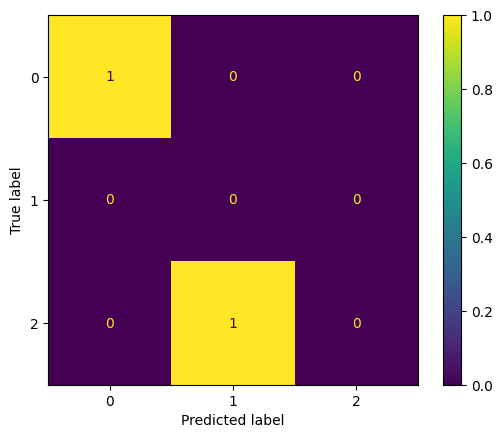

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm_SGD = metrics.confusion_matrix(label_uji_aspek, prediksi_aspek)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_SGD)
cm_display.plot()
plt.show()

In [58]:
from sklearn.metrics import precision_score

print(precision_score(label_uji_aspek, prediksi_aspek, average='macro'))

0.3333333333333333


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import recall_score

print(recall_score(label_uji_aspek, prediksi_aspek, average='macro'))

0.3333333333333333


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import f1_score
print(f1_score(label_uji_aspek, prediksi_aspek, average='macro'))

0.3333333333333333


In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label_uji_aspek, prediksi_aspek))

0.5
